In [1]:
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")

/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
data = pd.read_csv(
    filepath_or_buffer="data/monthly-milk-production-pounds-p.csv", 
    header=0,
    names=["date", "production"], 
    parse_dates=["date"], 
    index_col="date"
)
data = data.iloc[:-1, :]
data.head()

,production
date,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


In [13]:
data.index = pd.to_datetime(data.index)
data.head()

,production
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   production  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


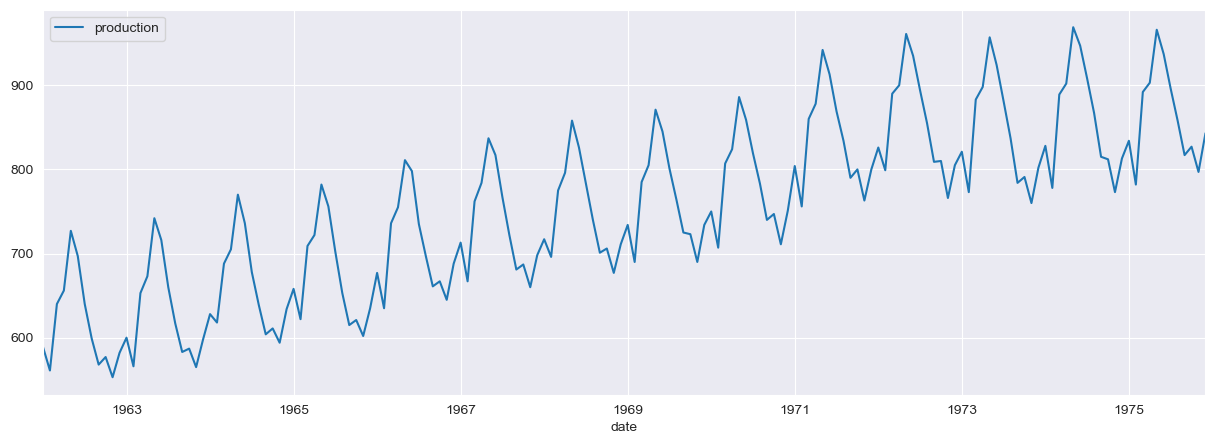

In [15]:
data.plot(figsize=(15, 5));

In [16]:
time_series = data.production
print(type(time_series))

<class 'pandas.core.series.Series'>


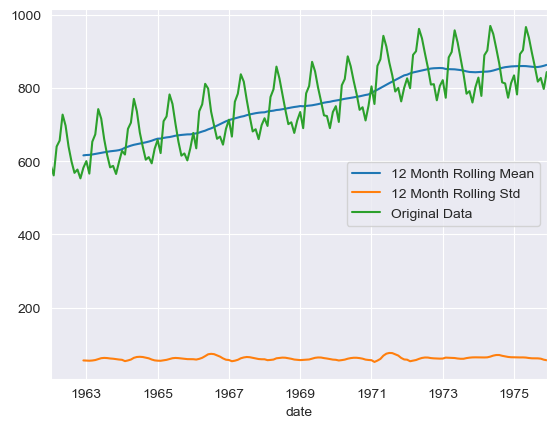

In [18]:
time_series.rolling(window=12).mean().plot(label="12 Month Rolling Mean")
time_series.rolling(window=12).std().plot(label="12 Month Rolling Std")

time_series.plot(label="Original Data")
plt.legend();

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

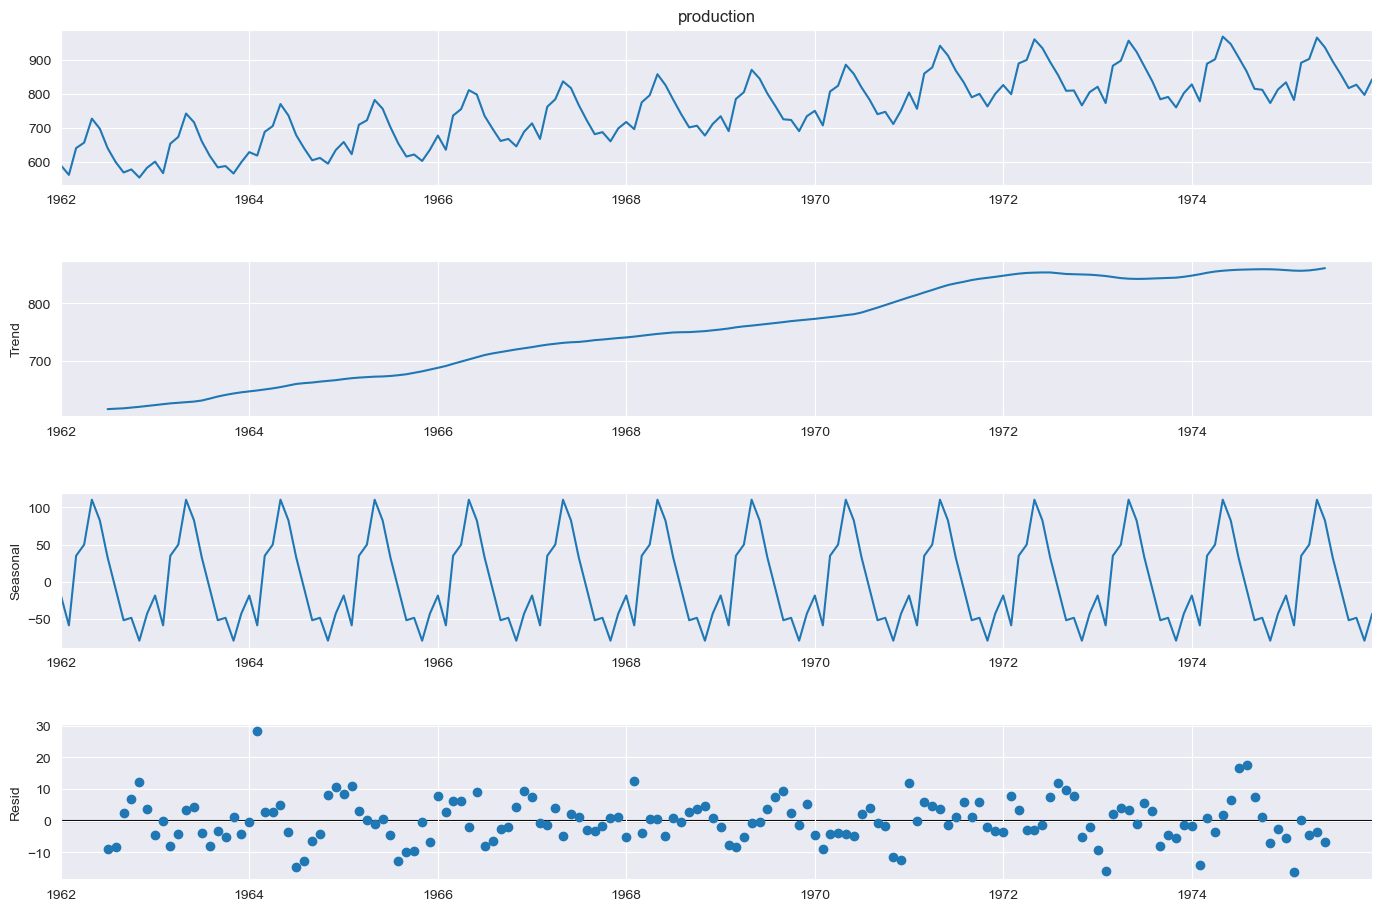

In [23]:
decomp = seasonal_decompose(time_series)
fig = decomp.plot()
fig.set_size_inches(15, 10)

In [24]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.production)

In [25]:
result

(-1.3038115874221254,
 0.6274267086030335,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [26]:
def adf_check(input_time_series):
    result = adfuller(input_time_series)
    print("Augmented Dicky-Fuller Test")
    labels = [
        "ADF Test Statistic", 
        "p-value", 
        "# of lags", 
        "Num of Observations used"
    ]
    
    for value, label in zip(result, labels):
        print(label + " : " + str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
        
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non stationary")
        
adf_check(data.production)
    

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.3038115874221254
p-value : 0.6274267086030335
# of lags : 13
Num of Observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non stationary


In [28]:
data["first_difference"] = data["production"] - data["production"].shift(1)
data.head()

,production,first_difference
date,,
1962-01-01,589.0,NaN
1962-02-01,561.0,-28.0
1962-03-01,640.0,79.0
1962-04-01,656.0,16.0
1962-05-01,727.0,71.0


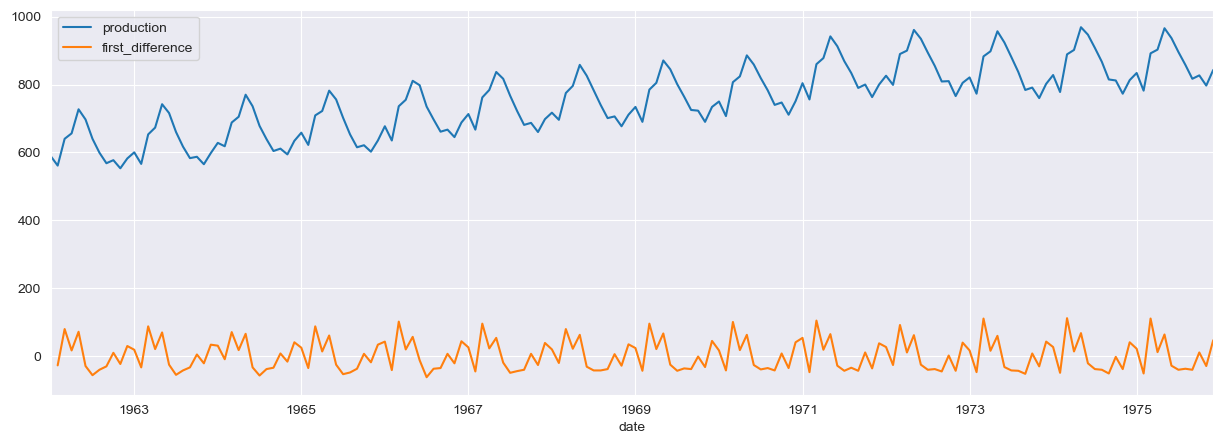

In [29]:
data.plot(figsize=(15, 5));

In [31]:
adf_check(data.first_difference.dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.054995558653071
p-value : 0.030068004001785612
# of lags : 14
Num of Observations used : 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [32]:
data["second_difference"] = data["first_difference"] - data["first_difference"].shift(1)

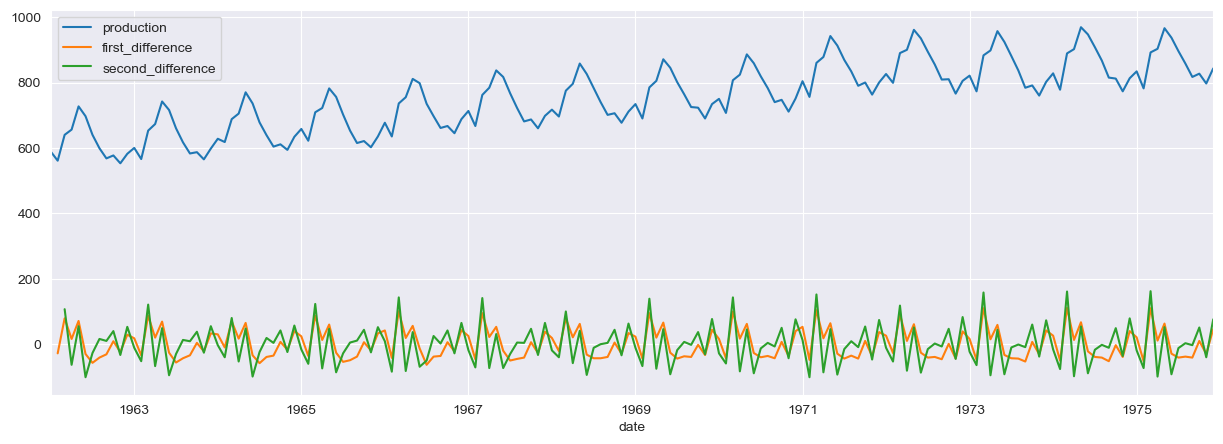

In [33]:
data.plot(figsize=(15, 5));

In [34]:
adf_check(data.second_difference.dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -14.327873645603306
p-value : 1.1126989332084267e-26
# of lags : 11
Num of Observations used : 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [35]:
data["seasonal_difference"] = data["production"] - data["production"].shift(12)
adf_check(data.seasonal_difference.dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.3354193143593966
p-value : 0.16079880527711388
# of lags : 12
Num of Observations used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non stationary


<Axes: xlabel='date'>

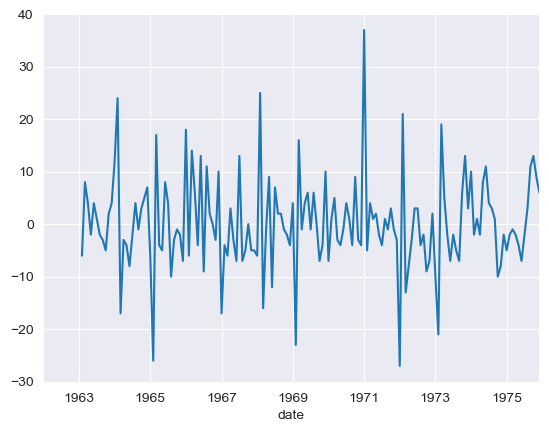

In [36]:
data["seasonal_first_difference"] = data.first_difference - data.first_difference.shift(12)
data.seasonal_first_difference.plot()

In [37]:
adf_check(data.seasonal_first_difference.dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -5.038002274921971
p-value : 1.865423431878946e-05
# of lags : 11
Num of Observations used : 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


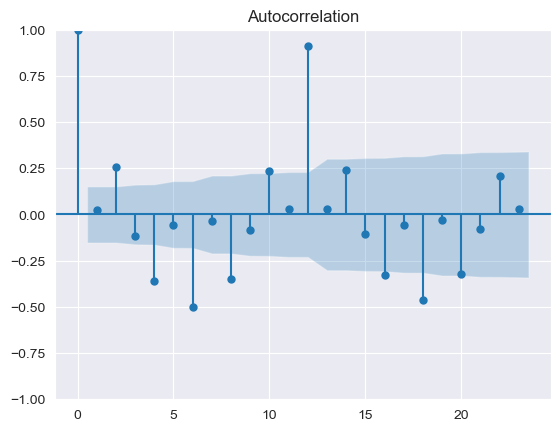

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig_first = plot_acf(data.first_difference.dropna())

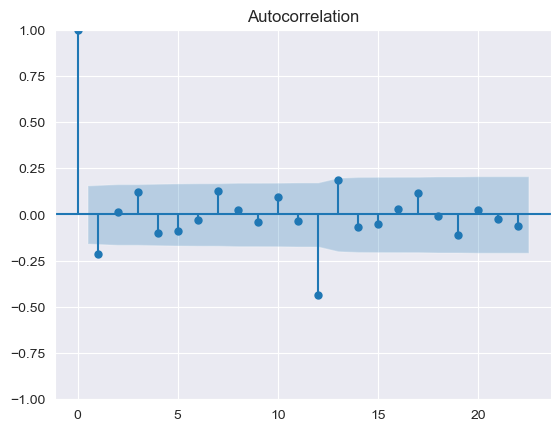

In [39]:
fig_seasonal_first = plot_acf(data.seasonal_first_difference.dropna())

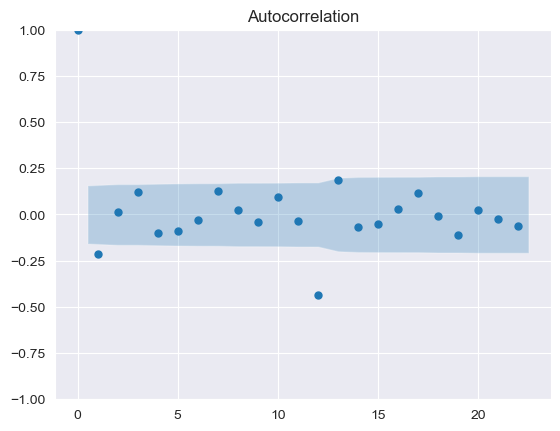

In [41]:
fig_seasonal_first = plot_acf(
    data.seasonal_first_difference.dropna(), 
    use_vlines=False
)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

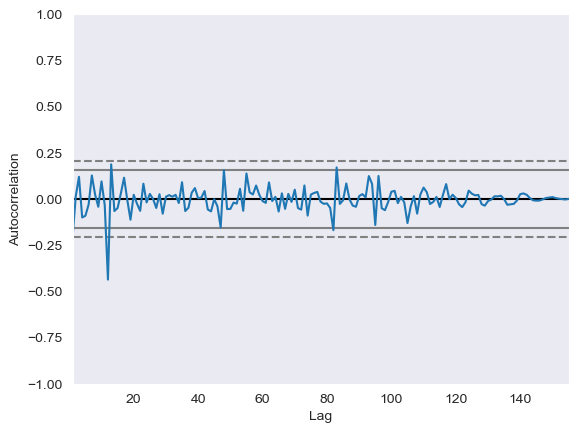

In [40]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data.seasonal_first_difference.dropna())

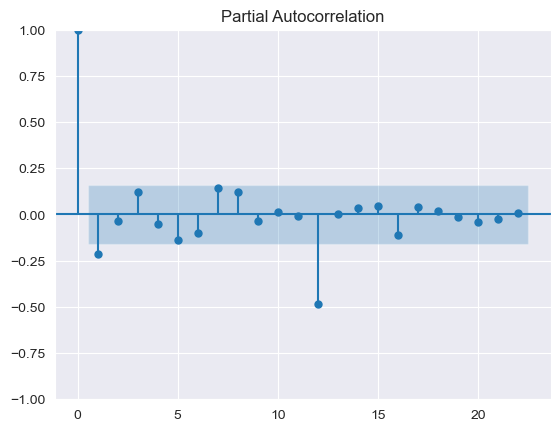

In [43]:
fig = plot_pacf(data.seasonal_first_difference.dropna())

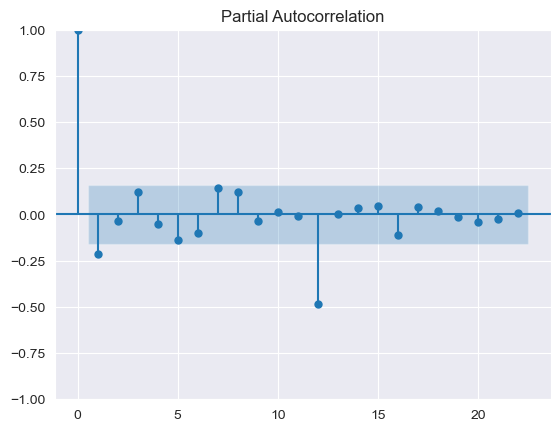

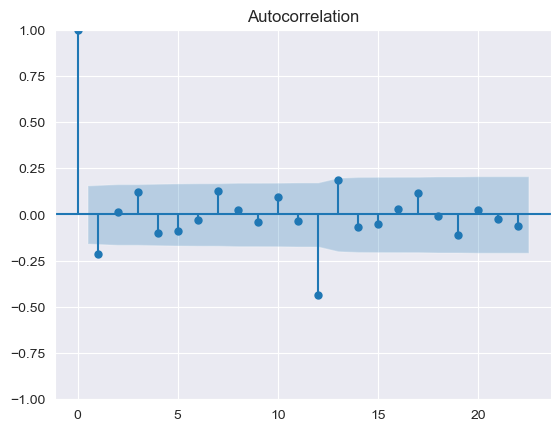

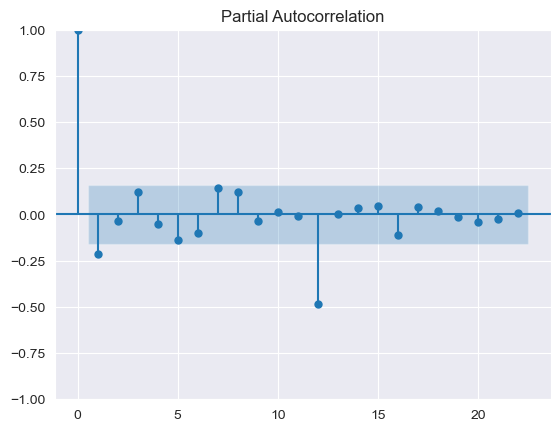

In [44]:
plot_acf(data.seasonal_first_difference.dropna())
plot_pacf(data.seasonal_first_difference.dropna())

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(*args, **kwargs)
 |  
 |  ARIMA has been deprecated in favor of the new implementation
 |  
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |  
 |  Method resolution order:
 |      ARIMA
 |      ARMA
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from ARMA:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [47]:
model = sm.tsa.statespace.SARIMAX(
    data.production,
    order=(0, 1, 0), 
    seasonal_order=(1, 1, 1, 12)
)

/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18877D+00    |proj g|=  7.76704D-02

At iterate    5    f=  3.17904D+00    |proj g|=  6.55259D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   2.144D-06   3.179D+00
  F =   3.1789606817881597     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [49]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           production   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Tue, 25 Apr 2023   AIC                           1074.131
Time:                                      06:59:48   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

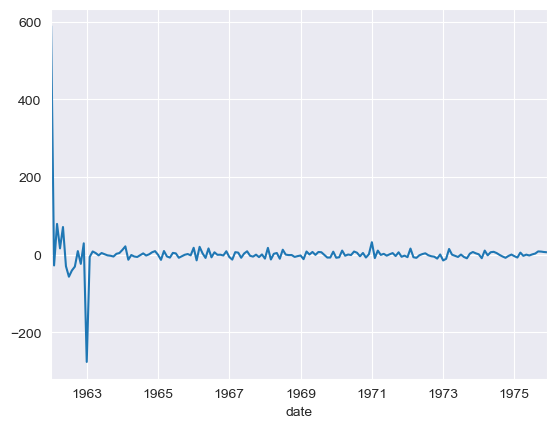

In [51]:
result.resid.plot();

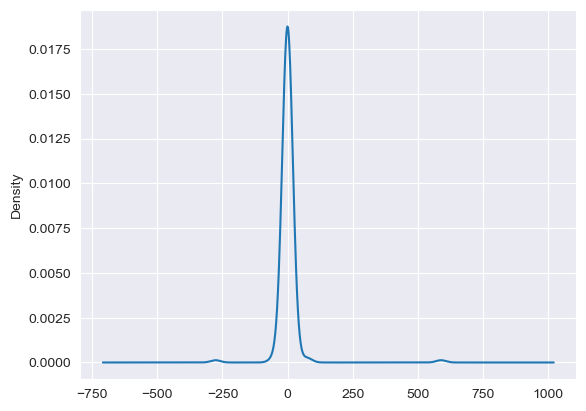

In [52]:
result.resid.plot(kind="kde");

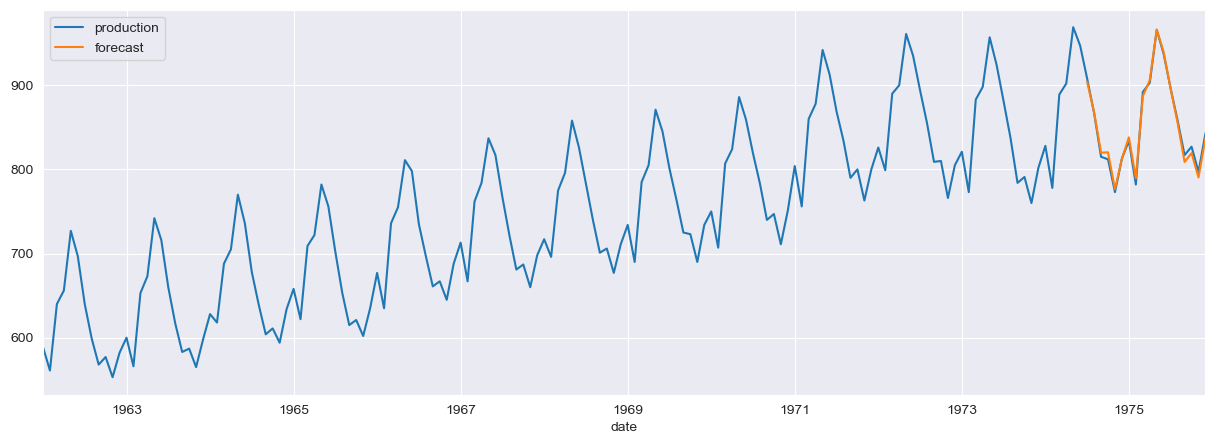

In [54]:
data["forecast"] = result.predict(start=150, end=168)
data[["production", "forecast"]].plot(figsize=(15, 5));

In [57]:
data.tail(3)

,production,first_difference,second_difference,seasonal_difference,seasonal_first_difference,forecast
date,,,,,,
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [56]:
from pandas.tseries.offsets import DateOffset

future_dates = [data.index[-1] + DateOffset(months=x) for x in range(1, 24)]
future_dates


[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [58]:
future_df = pd.DataFrame(index=future_dates, columns=data.columns)
future_df.head()

,production,first_difference,second_difference,seasonal_difference,seasonal_first_difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
final_df = pd.concat([data, future_df])
final_df.head()

,production,first_difference,second_difference,seasonal_difference,seasonal_first_difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [60]:
final_df.shape

(191, 6)

In [64]:
final_df["forecast"] = result.predict(start=168, end=192)
final_df.tail()

,production,first_difference,second_difference,seasonal_difference,seasonal_first_difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525867
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918957
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881181
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027295
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962996


<Axes: >

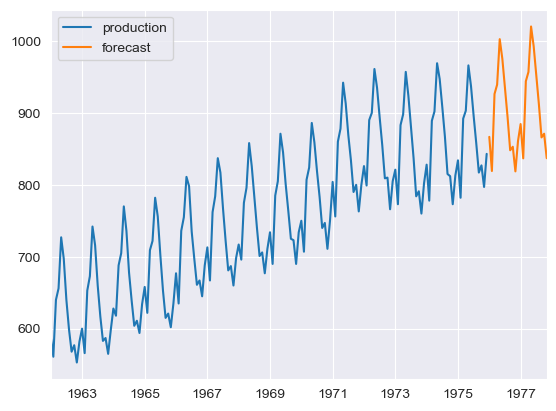

In [65]:
final_df[["production", "forecast"]].plot()